In [1]:
from matplotlib import pyplot as plt
import random

In [2]:
def vector_add(u, v):
    return [u_i + v_i for u_i, v_i in zip(u, v)]
def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]
def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]
def vector_mean(vectors):
    l = len(vectors)
    return scalar_multiply(1/l, vector_sum(vectors))

In [3]:
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))
def sum_of_squares(v):
    return dot(v, v)
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

In [4]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.means = None
    
    def classify(self, input):
        return min(range(self.k), key=lambda i: squared_distance(input, self.means[i]))
    
    def train(self, inputs):
        self.means = random.sample(inputs, self.k)
        assignments = None
        
        while True:
            new_assignments = list(map(self.classify, inputs))

            if assignments == new_assignments:
                return
            assignments = new_assignments
            
            for i in range(self.k):
                i_points = [p for p, a in zip(inputs, assignments) if a == i]
                
                if i_points:
                    self.means[i] = vector_mean(i_points)
    

In [5]:
inputs = [[-14,-5],[13,13],[20,23],[-19,-11],[-9,-16],[21,27],[-49,15],[26,13],[-46,5],[-34,-1],[11,15],[-49,0],[-22,-16],[19,28],[-12,-8],[-13,-19],[-41,8],[-11,-6],[-25,-9],[-18,-3]]

In [6]:
random.seed(1)
clusterer = KMeans(3)
clusterer.train(inputs)
print(clusterer.means)

[[-15.888888888888888, -10.333333333333332], [-43.800000000000004, 5.4], [18.333333333333332, 19.833333333333332]]


In [7]:
def squared_clustering_errors(inputs, k):
    """finds the total squared error from k-means clustering the inputs"""
    clusterer = KMeans(k)
    clusterer.train(inputs)
    means = clusterer.means
    
    assignments = map(clusterer.classify, inputs)
    
    return sum(squared_distance(input, means[cluster])
                  for input, cluster in zip(inputs, assignments))


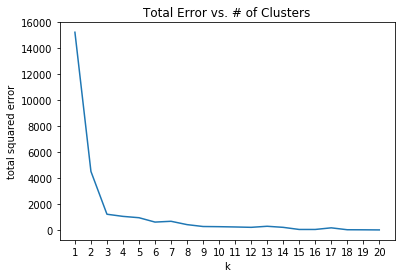

In [8]:
ks = range(1, len(inputs) + 1)
errors = [squared_clustering_errors(inputs, k) for k in ks]
plt.plot(ks, errors)
plt.xticks(ks)
plt.xlabel("k")
plt.ylabel("total squared error")
plt.title("Total Error vs. # of Clusters")
plt.show()

In [9]:
import matplotlib.image as mpimg
path_to_jpg_file = r"/home/monster/aruvi.jpg"
img = mpimg.imread(path_to_jpg_file)

In [10]:
img

array([[[228, 217,  65],
        [225, 214,  62],
        [231, 220,  70],
        ..., 
        [242, 224, 126],
        [160, 138,  62],
        [ 65,  41,   0]],

       [[220, 209,  81],
        [243, 232, 104],
        [232, 221,  95],
        ..., 
        [231, 218, 122],
        [149, 133,  56],
        [ 48,  30,   0]],

       [[222, 212, 125],
        [207, 197, 110],
        [213, 201, 117],
        ..., 
        [215, 209, 131],
        [145, 137,  75],
        [ 50,  40,   0]],

       ..., 
       [[ 95,  92, 119],
        [ 37,  40,  73],
        [ 62,  70, 116],
        ..., 
        [ 15,  27, 109],
        [ 13,  28, 109],
        [ 14,  31, 111]],

       [[ 81,  79, 103],
        [ 51,  54,  87],
        [ 23,  30,  76],
        ..., 
        [ 14,  25, 107],
        [ 11,  23, 105],
        [ 13,  28, 109]],

       [[ 53,  51,  75],
        [ 60,  63,  94],
        [ 29,  36,  80],
        ..., 
        [ 22,  33, 115],
        [ 17,  28, 110],
        [ 15,  27,

In [11]:
top_row = img[0]
top_left_pixel = top_row[0]
red, green, blue = top_left_pixel

In [12]:
pixels = [pixel for row in img for pixel in row]

In [13]:
pixels

[array([228, 217,  65], dtype=uint8),
 array([225, 214,  62], dtype=uint8),
 array([231, 220,  70], dtype=uint8),
 array([240, 226,  78], dtype=uint8),
 array([216, 202,  54], dtype=uint8),
 array([234, 218,  70], dtype=uint8),
 array([233, 218,  67], dtype=uint8),
 array([232, 218,  60], dtype=uint8),
 array([233, 219,  58], dtype=uint8),
 array([230, 217,  51], dtype=uint8),
 array([231, 218,  51], dtype=uint8),
 array([232, 221,  53], dtype=uint8),
 array([229, 218,  51], dtype=uint8),
 array([220, 211,  46], dtype=uint8),
 array([223, 214,  51], dtype=uint8),
 array([231, 221,  61], dtype=uint8),
 array([220, 208,  60], dtype=uint8),
 array([224, 212,  66], dtype=uint8),
 array([241, 229,  85], dtype=uint8),
 array([220, 208,  64], dtype=uint8),
 array([231, 219,  75], dtype=uint8),
 array([226, 211,  66], dtype=uint8),
 array([231, 217,  69], dtype=uint8),
 array([247, 233,  82], dtype=uint8),
 array([225, 212,  56], dtype=uint8),
 array([226, 213,  55], dtype=uint8),
 array([227,

In [14]:
clusterer = KMeans(5)
clusterer.train(pixels)    # this might take a while

/home/monster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in ubyte_scalars
  after removing the cwd from sys.path.
/home/monster/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in ubyte_scalars
  


KeyboardInterrupt: 

In [ ]:
def recolor(pixel):
    cluster = clusterer.classify(pixel)       # index of the closest cluster
    return clusterer.means[cluster]           # mean of the closest cluster

In [ ]:
new_img = [[recolor(pixel) for pixel in row] # recolor this row of pixels
                        for row in img]

In [ ]:
plt.imshow(new_img)

In [ ]:
plt.axis('off')

In [ ]:
plt.show()

In [15]:
leaf1 = ([10, 20],)      # to make a 1-tuple you need the trailing comma
leaf2 = ([30, -15],)     # else python treats the parentheses as parentheses

In [16]:
merged = (1, [leaf1, leaf2])

In [17]:
def is_leaf(cluster):
    """a cluster is a leaf if it has lenght 1"""
    return len(cluster) == 1
def get_children(cluster):
    """returns the two children of this cluster if it's a merged cluster;
    raises an exception if this is a leaf cluster"""
    if is_leaf(cluster):
        raise TypeError("a leaf cluster has no children")
    else:
        return cluster[1]

In [18]:
def get_values(cluster):
    """Returns the value in this cluster (if it's a leaf cluster)
    or all the values in the leaf clusters below it (if it's not)"""
    if is_leaf(cluster):
        return cluster         # is already a 1-tuple containing value
    else:
        return [value
                   for child in get_child(cluster)
                   for value in get_values(child)]